In [1]:
import this


### Observations  1. average tumor weigh is posiively correlated wih mouseweight at least  for the drug capomulin
### 2. this study looked at relaively similar numbers across both weigh and gender
### 3.   Infubinol and Ceftamin seem to have higher tumor sizes than Cefomulin and Ramicane

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [254]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full=mouse_metadata.merge(study_results, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview

full.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [71]:
# Checking the number of mice.
len(full["Mouse ID"].unique().tolist())

249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup=full[full.duplicated(subset=['Mouse ID',"Timepoint"],keep=False)]
print(dup)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
print(dup)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full.drop(full.loc[full['Mouse ID']=="g989"].index, inplace=True)
full

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [78]:
# Checking the number of mice in the clean DataFrame.
len(full["Mouse ID"].unique().tolist())

248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=full.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=full.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=full.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd=full.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM=full.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
mean

mean=mean.to_frame()
median=median.to_frame()
sd=sd.to_frame()
variance=variance.to_frame()
SEM=SEM.to_frame()

m1=mean.merge(median, left_on='Drug Regimen', right_on="Drug Regimen")
m2=m1.merge(variance, left_on='Drug Regimen', right_on="Drug Regimen")
m3=m2.merge(sd, left_on='Drug Regimen', right_on="Drug Regimen")
mf=m3.merge(SEM, left_on='Drug Regimen', right_on="Drug Regimen")
mf.columns=["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Standard Deviation","Tumor Volume SEM"]
mf



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [273]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sdf=full.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
sdf


#sdf.agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug'>

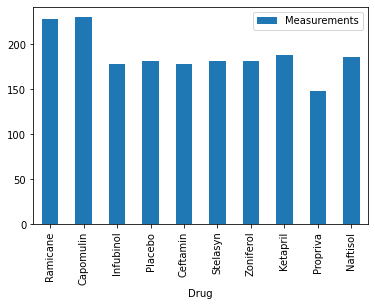

In [145]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
totmes=[]
regimens=full["Drug Regimen"].unique()

for i in regimens:
    totmes.append(len(full.loc[full["Drug Regimen"]==i]))
totmes
plotdf=pd.DataFrame({'Drug':regimens,"Measurements": totmes})

plotdf.plot.bar(x='Drug',y="Measurements",rot=90)

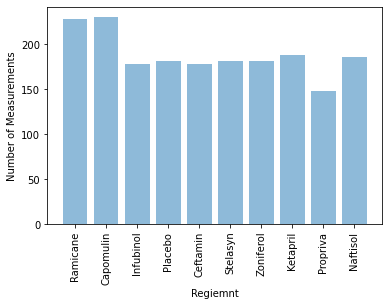

In [152]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
plt.bar(regimens, totmes, align='center', alpha=.5)
plt.ylabel("Number of Measurements")
plt.xlabel("Regiemnt")
plt.xticks(rotation=90)
plt.show()

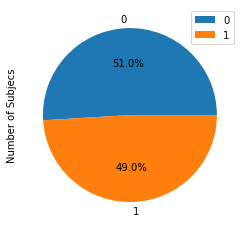

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders=full["Sex"].unique()
totgen=[]
for i in genders:
    totgen.append(len(full.loc[full["Sex"]==i]))
bardf=pd.DataFrame({'Gender':genders,"Number of Subjecs": totgen})
plot = bardf.plot.pie(y="Number of Subjecs",autopct='%1.1f%%')

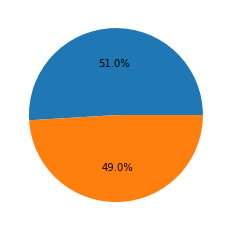

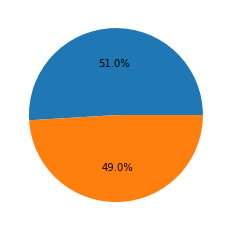

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(totgen,autopct='%1.1f%%')
plt.show(())

## Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

test=full.loc[full.groupby('Mouse ID')['Timepoint'].idxmax()]
test
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [284]:
# Put treatments into a list for for loop (and later for plot labels)
regimens=full["Drug Regimen"].unique()

Capomulin=full[full["Drug Regimen"]=="Capomulin"]
Ramicine=full[full["Drug Regimen"]=="Ramicine"]
Infubinol=full[full["Drug Regimen"]=="Infubinol"]
Ceftamin=full[full["Drug Regimen"]=="Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
vollist=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartilesCa = Capomulin["Tumor Volume (mm3)"].quantile([.25,.75])
quartilesR = Ramicine["Tumor Volume (mm3)"].quantile([.25,.75])
quartilesI = Infubinol["Tumor Volume (mm3)"].quantile([.25,.75])
quartilesCe = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.75])
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    



<function matplotlib.pyplot.show(close=None, block=None)>

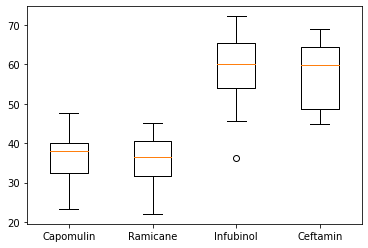

In [261]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data=[]
doi=["Capomulin","Ramicane","Infubinol","Ceftamin"]
for i in doi:
    data.append((test.loc[test["Drug Regimen"]==i])["Tumor Volume (mm3)"])



plt.boxplot(data)
plt.xticks([1,2,3,4],doi)
plt.show

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

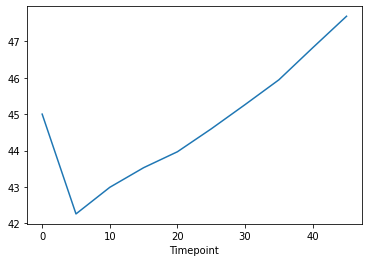

In [236]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo=full.loc[full["Drug Regimen"]=="Capomulin"]
exe=capo.loc[capo["Mouse ID"]=="i557"]

exe.set_index("Timepoint")["Tumor Volume (mm3)"].plot()




Text(0, 0.5, 'Average Tumor Volume  (mm 3)')

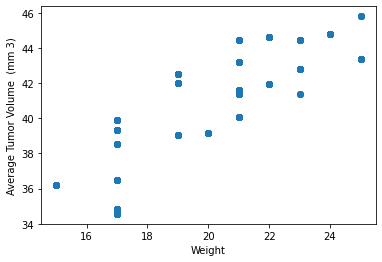

In [252]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
idk=capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
idk2=idk.to_frame()
idk3=idk2.merge(capo, left_on='Mouse ID', right_on='Mouse ID')
idk3
x=idk3["Weight (g)"]
y=idk3["Tumor Volume (mm3)_x"]
plt.scatter(x,y)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume  (mm 3)")


## Correlation and Regression

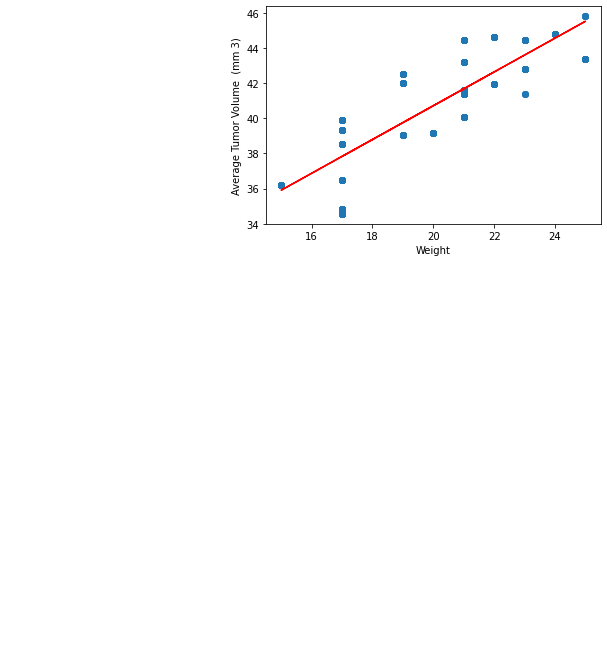

In [260]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regression,"r-")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume  (mm 3)")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()